# EDA for the default risk dataset

In this notebook we conduct an analysis to better understand the funda dataset. The goal is to understand what data is available, and what we can use as features for a classification model.
Note: to run this analysis notebook you need numpy, pandas, scipy, scikit-learn, pyarrow, and plotnine installed. You can install these in a conda environment using the conda package manager, or from command line:

- conda install -y numpy pandas scikit-learn scipy
- conda install -c conda-forge plotnine

## Read and clean data

In [1]:
#pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from plotnine import * # generally not a good thing to do to import everything from a package. However it's ok for visualization purposes in an analysis.
import os
import scipy

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [4]:
os.getcwd()

'c:\\Users\\Eigenaar\\Documents\\AI\\DDB_AI-main\\credit_risk_case_study'

In [8]:
#import funda dataset
df = pd.read_csv('funda_ai_dataset_v3.1.csv', delimiter=',')

In [9]:
df.head()
df.tail()

,Unnamed: 0,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
0,0,"Een heerlijk, lichte middenwoning gelegen in...",115.0,166.0,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5.0,28,1962
1,1,Instapklare en ruime twee-onder-een-kapwoning...,130.0,243.0,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4.0,12,1992
2,2,Mooie en ruime helft van een dubbel woonhui...,124.0,245.0,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4.0,104,1981
3,3,Geheel opgeknapte hoekwoning met dakopbouw e...,92.0,257.0,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4.0,18,1961
4,4,Deze ruime en goed onderhouden eindwoning m...,126.0,131.0,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4.0,24,1983


,Unnamed: 0,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
174955,174955,Aan de burgemeester Vogelaarstraat in Kruini...,88.0,266.0,1956,Tuin,"Eengezinswoning, vrijstaande woning",F,1 badkamer en 1 apart toilet,45,2020-11-02,2020-12-15,6 weken,Kruiningen,4416BP,265.000,5,3.0,43,1956
174956,174956,KEURIG ONDERHOUDEN TUSSENWONING MET ZONNIG G...,103.0,93.0,1984,Tuin,"Eengezinswoning, tussenwoning",B,1 badkamer en 1 apart toilet,30,2020-11-10,2021-01-01,7 weken,Delft,2622GH,329.500,4,3.0,52,1984
174957,174957,"Op een hele fijne plek, centraal in Maaslan...",109.0,156.0,1968,Achtertuin,"Eengezinswoning, tussenwoning",C,1 badkamer en 1 apart toilet,49,2020-11-03,2020-11-23,2 weken,Maasland,3155VD,367.000,5,4.0,20,1968
174958,174958,"** Englisch text below ** , ,U bent van ha...",234.0,455.0,1960,Tuin,"Villa, vrijstaande woning (drive-in woning)",F,2 badkamers en 2 aparte toiletten,53,2020-11-03,2020-12-04,4 weken,Diemen,1111EW,1.000.000,5,4.0,31,1960
174959,174959,Vanwege de grote belangstelling voor deze w...,118.0,200.0,1981,Tuin,"Eengezinswoning, hoekwoning",C,1 badkamer en 1 apart toilet,55,2020-11-05,2020-11-25,2 weken,Hellevoetsluis,3224PN,bij,5,4.0,20,1981


In [10]:
df.drop_duplicates(subset=['Unnamed: 0']).shape[0] == df.shape[0]

True

In [11]:
#rename column unnamed: 0 to id
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [12]:
df = df.set_index("id")
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
id,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115.0,166.0,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5.0,28,1962
1,Instapklare en ruime twee-onder-een-kapwoning...,130.0,243.0,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4.0,12,1992
2,Mooie en ruime helft van een dubbel woonhui...,124.0,245.0,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4.0,104,1981
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92.0,257.0,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4.0,18,1961
4,Deze ruime en goed onderhouden eindwoning m...,126.0,131.0,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4.0,24,1983


In [13]:
#count nans in entire dataset
df.isnull().sum().sum()

32323

In [14]:
#count nans in specifik column

#df['house_description'].isnull().sum()
#df['living_area_surface'].isnull().sum()
#df['property_surface'].isnull().sum()
#df['construction_year'].isnull().sum()
#df['garden'].isnull().sum() #keep this one
#df['type_house'].isnull().sum()
#df['energy_label'].isnull().sum()
#df['aantalfotos'].isnull().sum()
#df['publication_date'].isnull().sum()
#df['date_of_signiture'].isnull().sum()
#df['sell_time'].isnull().sum()
#df['plaats'].isnull().sum()
#df['postcode'].isnull().sum()
#df['ask_price'].isnull().sum()
#df['number_room'].isnull().sum()
#df['bedrooms'].isnull().sum()
#df['sell_time_cal'].isnull().sum()
#df['construction_year_1'].isnull().sum()

In [15]:
#drop nans
df.dropna(subset = ["living_area_surface"], inplace=True)
df.dropna(subset = ["property_surface"], inplace=True)
df.dropna(subset = ["aantalfotos"], inplace=True)
df.dropna(subset = ["plaats"], inplace=True)
df.dropna(subset = ["bedrooms"], inplace=True)

In [16]:
#make column aantalfotos and ask_price float or int 
#Split postcode
new = df['ask_price'].str.split(".", n = 2, expand = True)
  
# making separate first name column from new data frame
df["a"]= new[0]
  
# making separate last name column from new data frame
df["b"]= new[1]

df['c']= new[2]
  
# Dropping old Name columns

In [17]:
#combine columns to get one column with only numbers
df['asking_price'] = df["a"].astype(str) + df["b"].astype(str) + df["c"].astype(str)

In [18]:
df['asking_price'] = df['asking_price'].str.strip('None')

In [19]:
#del tekst in asking prce
df['asking_price'] = df['asking_price'].str.replace('bij', '0')
df['asking_price'] = df['asking_price'].str.replace('p', '0')

In [20]:
del df['a']
del df['b']
del df['c']

In [21]:
#turn object into integer
df['asking_price'] = df['asking_price'].astype(int)

In [22]:
df['construction_year_1'] = df['construction_year_1'].str.strip('Na ')

In [23]:
#construction_year into integer
df['construction_year_1'] = df['construction_year_1'].astype(int)

In [24]:
# colums to integer type
for i in [x for x in df.columns if x not in ['house_description', 'construction_year', 'garden', 'type_house', 'energy_label', 'aantalfotos', 'number_bathrooms', 'publication_date', 'date_of_signiture', 'sell_time', 'plaats', 'postcode', 'ask_price', 'construction_year_1'] ]:
    df[i]= df[i].astype(int)

In [25]:
df.dtypes

house_description      object
living_area_surface     int32
property_surface        int32
construction_year      object
garden                 object
type_house             object
energy_label           object
number_bathrooms       object
aantalfotos            object
publication_date       object
date_of_signiture      object
sell_time              object
plaats                 object
postcode               object
ask_price              object
number_room             int32
bedrooms                int32
sell_time_cal           int32
construction_year_1     int32
asking_price            int32
dtype: object

In [26]:
df[[ 'living_area_surface', 'property_surface', 'number_room', 'bedrooms', 'sell_time_cal', 'construction_year_1', 'asking_price']].describe()

,living_area_surface,property_surface,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
count,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,1.697170e+05
mean,120.315708,170.195702,4.690379,3.254712,42.673786,1970.552885,4.011160e+05
std,51.455494,187.411793,1.600285,1.195171,96.430241,37.107286,2.421808e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000,1005.000000,0.000000e+00
25%,89.000000,3.000000,4.000000,2.000000,16.000000,1955.000000,2.600000e+05
50%,113.000000,140.000000,5.000000,3.000000,22.000000,1975.000000,3.450000e+05
75%,138.000000,241.000000,5.000000,4.000000,34.000000,1997.000000,4.690000e+05
max,937.000000,999.000000,40.000000,28.000000,5106.000000,2024.000000,7.800000e+06


In [27]:
df.describe()

,living_area_surface,property_surface,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
count,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,1.697170e+05
mean,120.315708,170.195702,4.690379,3.254712,42.673786,1970.552885,4.011160e+05
std,51.455494,187.411793,1.600285,1.195171,96.430241,37.107286,2.421808e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000,1005.000000,0.000000e+00
25%,89.000000,3.000000,4.000000,2.000000,16.000000,1955.000000,2.600000e+05
50%,113.000000,140.000000,5.000000,3.000000,22.000000,1975.000000,3.450000e+05
75%,138.000000,241.000000,5.000000,4.000000,34.000000,1997.000000,4.690000e+05
max,937.000000,999.000000,40.000000,28.000000,5106.000000,2024.000000,7.800000e+06


In [28]:
n_nulls = df.loc[lambda x: x.isnull().any(axis=1)].shape 
print(f"There are {n_nulls[0]} rows with null values in this dataset") 

#the nans are from garden

There are 22298 rows with null values in this dataset


In [29]:
#replace garden nan with geen tuin
df['garden'] = df['garden'].fillna('Geen tuin')

In [31]:
#unique column check

#df['house_description'].unique()
#df['living_area_surface'].unique()
#df['property_surface'].unique()
#df['construction_year'].unique()
#df['garden'].unique()
df['type_house'].unique()
#df['energy_label'].unique()
#df['aantalfotos'].unique()
#df['publication_date'].unique()
#df['date_of_signiture'].unique()
#df['sell_time'].unique()
#df['plaats'].unique()
#df['postcode'].unique()
#df['ask_price'].unique()
#df['asking_price'].unique()
#df['number_room'].unique()
#df['bedrooms'].unique()
#df['sell_time_cal'].unique()
#df['construction_year_1'].unique()

array(['Eengezinswoning, tussenwoning',
       'Eengezinswoning, 2-onder-1-kapwoning',
       'Eengezinswoning, hoekwoning', 'Eengezinswoning, eindwoning',
       'Herenhuis, tussenwoning', 'Bovenwoning (appartement)',
       'Portiekflat (appartement)',
       'Eengezinswoning, tussenwoning (drive-in woning)',
       'Eengezinswoning, eindwoning (hofjeswoning)', 'Portiekflat',
       'Maisonnette', 'Woonboerderij, vrijstaande woning',
       'Galerijflat (appartement)', 'Eengezinswoning, vrijstaande woning',
       'Eengezinswoning, geschakelde 2-onder-1-kapwoning', 'Galerijflat',
       'Bovenwoning (dubbel bovenhuis)', 'Benedenwoning',
       'Maisonnette (appartement)', 'Villa, vrijstaande woning',
       'Penthouse (appartement)', 'Bungalow, vrijstaande woning',
       'Woonboerderij, vrijstaande woning (bedrijfs- of dienstwoning)',
       'Tussenverdieping (appartement)', 'Portiekwoning (appartement)',
       'Eengezinswoning, vrijstaande woning (dijkwoning)',
       'Eengezinswo

In [32]:
#replace garden wrong values
df['garden'] = df['garden'].str.replace('Jaarlijkse vergadering', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Plaats', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Capaciteit', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Isolatie', 'Geen tuin')

In [33]:
#replace aantalfotos wrong values
df['aantalfotos'] = df['aantalfotos'].str.replace('2,16', '16')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,16', '16')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,10', '10')
df['aantalfotos'] = df['aantalfotos'].str.replace('2,9', '9')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,8,2', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('12,30', '30')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,5,8', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,26', '26')
df['aantalfotos'] = df['aantalfotos'].str.replace('5,24', '24')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,9', '9')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,10', '10')
df['aantalfotos'] = df['aantalfotos'].str.replace('2,5', '5')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,13', '13')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,11', '11')

In [34]:
#aantalfotos to int
df['aantalfotos'] = df['aantalfotos'].astype(int)

In [35]:
df.dtypes

house_description      object
living_area_surface     int32
property_surface        int32
construction_year      object
garden                 object
type_house             object
energy_label           object
number_bathrooms       object
aantalfotos             int32
publication_date       object
date_of_signiture      object
sell_time              object
plaats                 object
postcode               object
ask_price              object
number_room             int32
bedrooms                int32
sell_time_cal           int32
construction_year_1     int32
asking_price            int32
dtype: object

In [36]:
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
id,,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115,166,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5,28,1962,375000
1,Instapklare en ruime twee-onder-een-kapwoning...,130,243,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4,12,1992,425000
2,Mooie en ruime helft van een dubbel woonhui...,124,245,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4,104,1981,299000
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92,257,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4,18,1961,295000
4,Deze ruime en goed onderhouden eindwoning m...,126,131,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4,24,1983,345000


In [37]:
#make column house_type1 with categorys
#Split postcode
new = df['type_house'].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
df["type_house1"]= new[0]
  
# making separate last name column from new data frame
df["type_house2"]= new[1]
  
# Dropping old Name columns

In [38]:
df['type_house1'].unique()

array(['Eengezinswoning,', 'Herenhuis,', 'Bovenwoning', 'Portiekflat',
       'Maisonnette', 'Woonboerderij,', 'Galerijflat', 'Benedenwoning',
       'Villa,', 'Penthouse', 'Bungalow,', 'Tussenverdieping',
       'Portiekwoning', 'Landhuis,', 'Dubbel', 'Beneden', 'Grachtenpand,',
       'Woonboot,', 'Woonwagen,', 'Landgoed,', 'Studentenkamer'],
      dtype=object)

In [39]:
df['type_house1'] = df['type_house1'].str.strip(',')

In [40]:
df['type_house1']

id
0         Eengezinswoning
1         Eengezinswoning
2         Eengezinswoning
3         Eengezinswoning
4         Eengezinswoning
               ...       
174955    Eengezinswoning
174956    Eengezinswoning
174957    Eengezinswoning
174958              Villa
174959    Eengezinswoning
Name: type_house1, Length: 169717, dtype: object

In [41]:
del df['type_house2']

In [42]:
#df.dtypes

In [43]:
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,...,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price,type_house1
id,,,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115,166,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,...,4 weken,Heiloo,1851SK,375.000,6,5,28,1962,375000,Eengezinswoning
1,Instapklare en ruime twee-onder-een-kapwoning...,130,243,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,...,12 dagen,Vlijmen,5251SG,425.000,5,4,12,1992,425000,Eengezinswoning
2,Mooie en ruime helft van een dubbel woonhui...,124,245,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,...,3 maanden,Dinxperlo,7091TB,299.000,5,4,104,1981,299000,Eengezinswoning
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92,257,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,...,2 weken,Hellevoetsluis,3222CA,295.000,5,4,18,1961,295000,Eengezinswoning
4,Deze ruime en goed onderhouden eindwoning m...,126,131,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,...,3 weken,Rotterdam,3068GN,345.000,5,4,24,1983,345000,Eengezinswoning


In [46]:
#to export csv
#df.to_csv('funda_after_eda.csv')

# Category distribution

In [47]:
#divid column into x categories
df = df.assign(aantalfotos_cat = pd.cut(df['aantalfotos'], 5, labels = ['very low', 'low', 'medium', 'high', 'very high']))

In [48]:
#frequenty table
def generate_freq_table(df, variable = ['garden']):
    dfs = []
    for i in variable:
        df_count = (
            df.groupby(i)
            .size()
            .reset_index(name='N')
            .assign(var = i)
            .rename(columns={i: 'category'})
        )
        dfs.append(df_count)
        res = pd.concat(dfs)
        res['category'] = res['category'].astype(str)
    return res

In [49]:
#make freq_table
generate_freq_table(df, ['garden','aantalfotos_cat'])

,category,N,var
0,Achtertuin,8904,garden
1,Balkon/dakterras,24627,garden
2,Geen tuin,22827,garden
3,Patio/atrium,77,garden
4,Tuin,112533,garden
5,Voortuin,146,garden
6,Voorzieningen,254,garden
7,Zijtuin,153,garden
8,Zonneterras,196,garden
0,very low,69380,aantalfotos_cat


In [50]:
#distribution category
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )

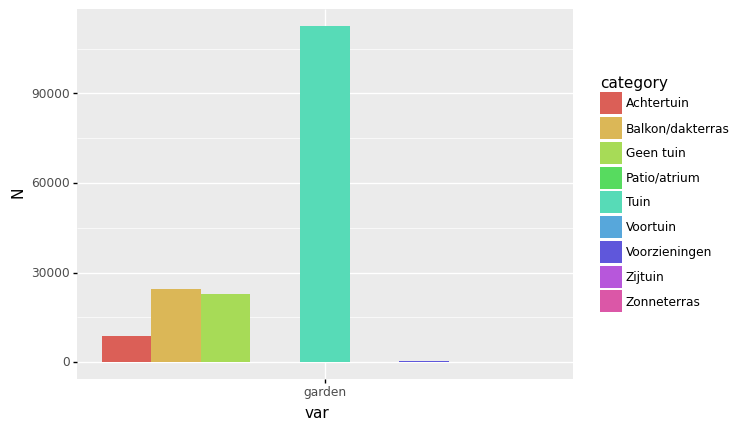

<ggplot: (103453128355)>

In [51]:
generate_freq_plot(generate_freq_table(df, ['garden']))

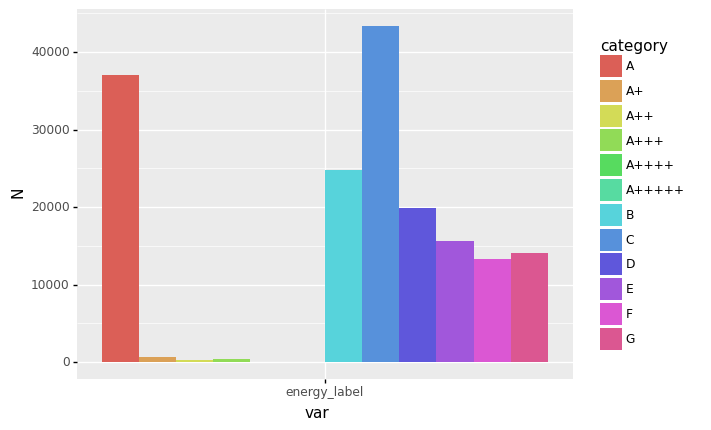

<ggplot: (103407711853)>

In [72]:
generate_freq_plot(generate_freq_table(df, ['energy_label']))

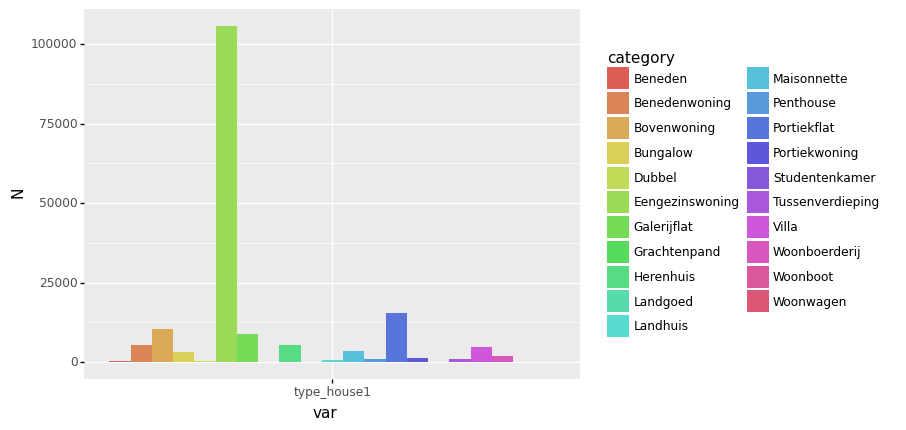

<ggplot: (103410121195)>

In [64]:
generate_freq_plot(generate_freq_table(df, ['type_house1']))

In [65]:
generate_freq_table(df, ['type_house1'])

,category,N,var
0,Beneden,378,type_house1
1,Benedenwoning,5550,type_house1
2,Bovenwoning,10343,type_house1
3,Bungalow,3152,type_house1
4,Dubbel,277,type_house1
5,Eengezinswoning,105647,type_house1
6,Galerijflat,8908,type_house1
7,Grachtenpand,168,type_house1
8,Herenhuis,5263,type_house1
9,Landgoed,25,type_house1


# Visualise int data

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 7853'. Pick better value with 'binwidth'.


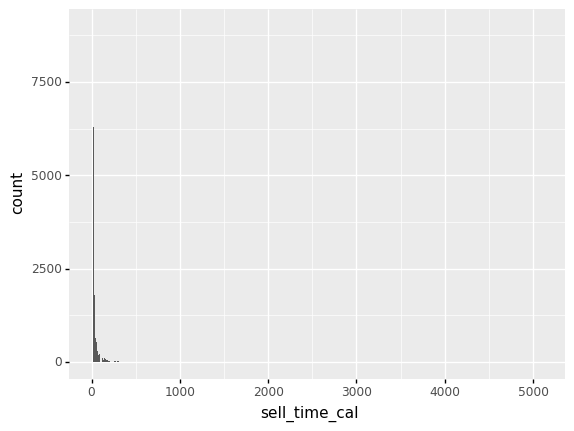

<ggplot: (103406891680)>

C:\Users\Eigenaar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 7853'. Pick better value with 'binwidth'.


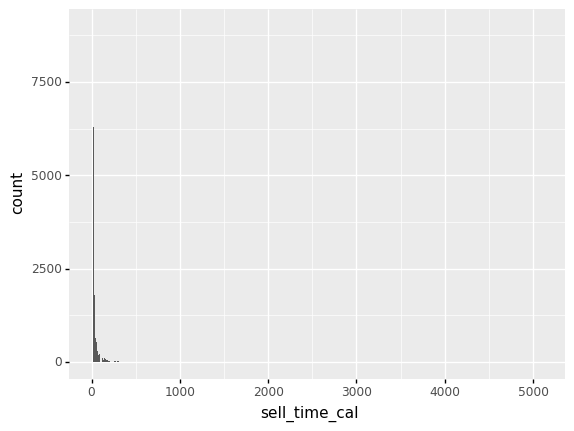

<ggplot: (103406891740)>

In [78]:
(
    ggplot(df, aes(x='sell_time_cal')) +
    geom_histogram()
)

(
    ggplot(df.assign(sell_time_cal_log = lambda x: np.log(x.sell_time_cal)), aes(x='sell_time_cal')) +
    geom_histogram()
)


C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 1034'. Pick better value with 'binwidth'.


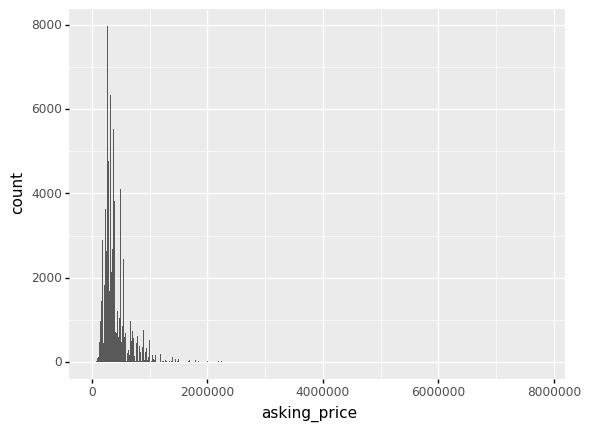

<ggplot: (103402884768)>

C:\Users\Eigenaar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 1034'. Pick better value with 'binwidth'.


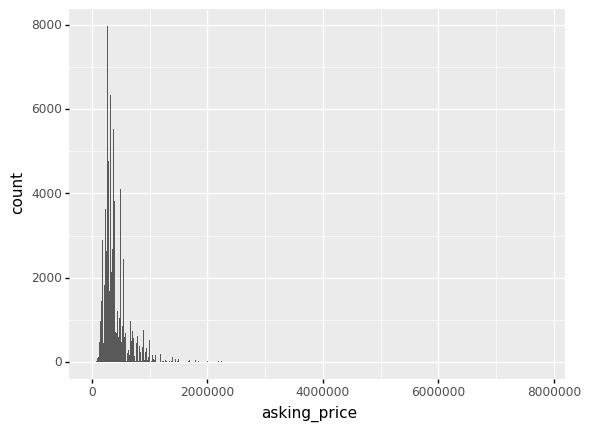

<ggplot: (103406822744)>

In [77]:
(
    ggplot(df, aes(x='asking_price')) +
    geom_histogram()
)

(
    ggplot(df.assign(asking_price_log = lambda x: np.log(x.asking_price)), aes(x='asking_price')) +
    geom_histogram()
)

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 281'. Pick better value with 'binwidth'.


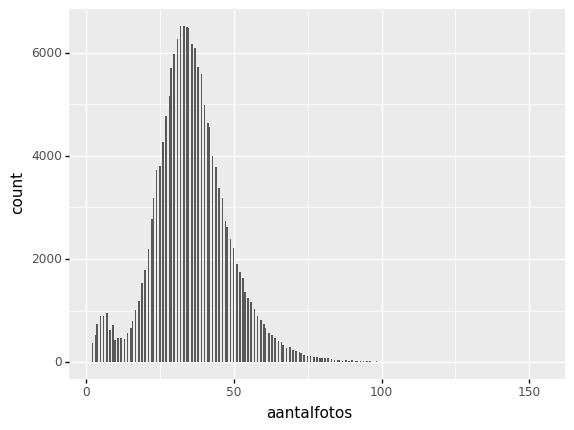

<ggplot: (103406378810)>

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 281'. Pick better value with 'binwidth'.


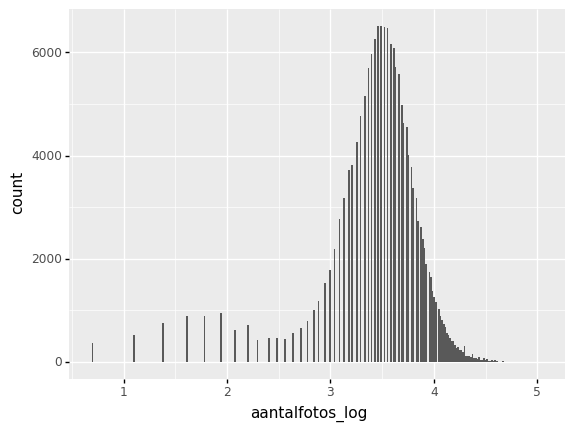

<ggplot: (103405760100)>

In [75]:
(
    ggplot(df, aes(x='aantalfotos')) +
    geom_histogram()
)

(
    ggplot(df.assign(aantalfotos_log = lambda x: np.log(x.aantalfotos)), aes(x='aantalfotos_log')) +
    geom_histogram()
)

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 259'. Pick better value with 'binwidth'.


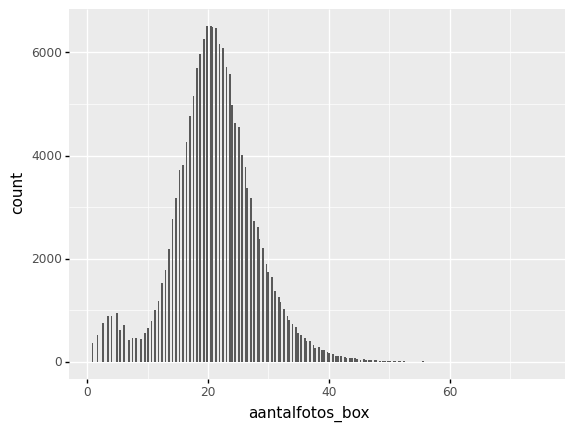

<ggplot: (103404864482)>

Here's how the inverse of the box-coxed transformed age looks:
[61. 46. 43. ... 49. 53. 55.]
Which is identical to the original value of age:
[61 46 43 ... 49 53 55]


In [76]:
# let's try a boxcox transform
# first we find the box-cox transforms of the aantalfotos column
aantalfotos_boxed = scipy.stats.boxcox(df.aantalfotos) # returns a tuple with (1) vector of transformed values, (2) lambda value found by the optimizer. The lambda value specifies the exact closed-form of the transforming function
aantalfotos_boxed_v = aantalfotos_boxed[0] # the transformed values
aantalfotos_boxed_lambda = aantalfotos_boxed[1] # the lambda value found by the optimizer

# the aantalfotos variable now looks closer to normal, although the gaps in the range show that this approach has limited 
# value for an inherently discrete variable like age. However, for continuous variables this can substantially improve the performance of 
# your model
(
    ggplot(df.assign(aantalfotos_box = aantalfotos_boxed_v), aes(x='aantalfotos_box')) +
    geom_histogram()
)

# we can then apply the inverse transform using box_cox_inv and passing in the lambda value. This will transform
# the box-coxed aantalfotos back to the original vector
aantalfotos_boxed_inv = scipy.special.inv_boxcox(aantalfotos_boxed_v, aantalfotos_boxed_lambda)
print("Here's how the inverse of the box-coxed transformed age looks:")
print(aantalfotos_boxed_inv)
print("Which is identical to the original value of age:")
print(df.aantalfotos.to_numpy())